In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('election2024.csv')
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [4]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

# check null value

In [12]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

# Demographic Analysis:

# 1. Distribution of Voters by Age and Sex: Analyze how the voting population is distributed across different age groups and gender.

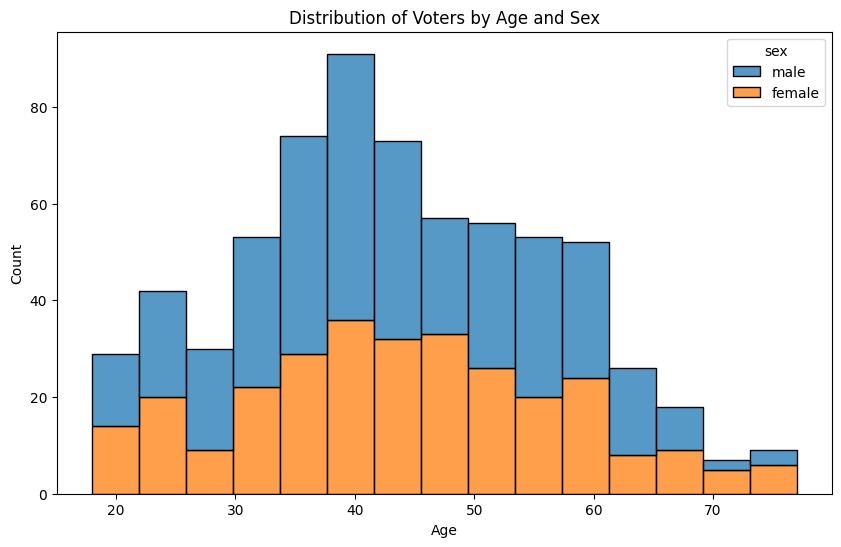

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', kde=False)
plt.title('Distribution of Voters by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# 2.Federal District vs. City Type: Explore the distribution of voters across federal districts and types of cities (urban/rural).

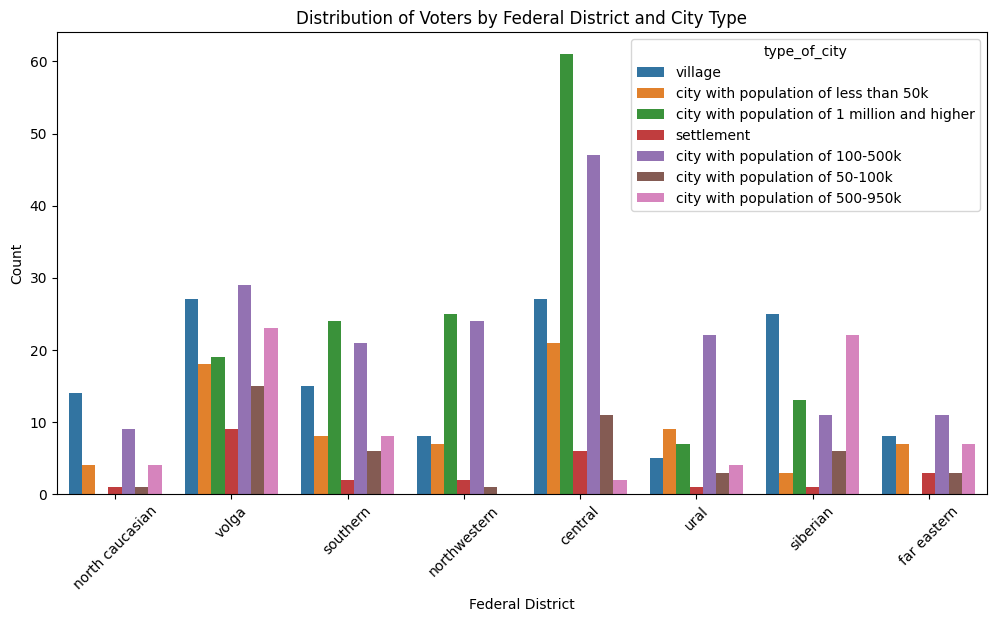

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='federal_district', hue='type_of_city')
plt.title('Distribution of Voters by Federal District and City Type')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Voting Behavior:

# 3. Awareness of Election Date: Investigate how many respondents are aware of the election date and how it correlates with their intention to vote.

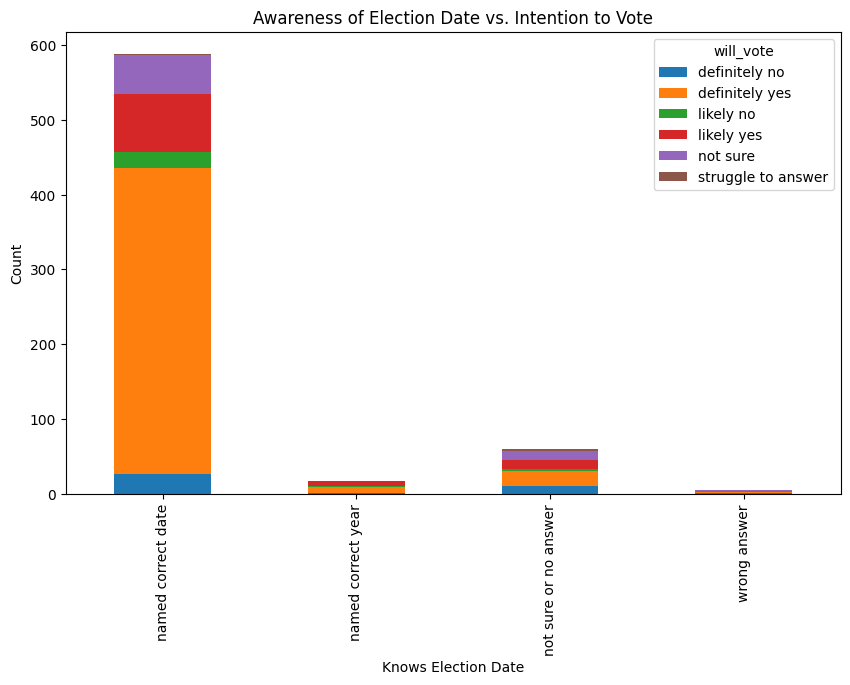

In [54]:
awareness_vs_vote = pd.crosstab(df['knows_election_date'], df['will_vote'])
awareness_vs_vote.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Awareness of Election Date vs. Intention to Vote')
plt.xlabel('Knows Election Date')
plt.ylabel('Count')
plt.show()


# 4. Voter Turnout Prediction: Explore the likelihood of voter turnout based on demographic factors such as age, sex, and city type.

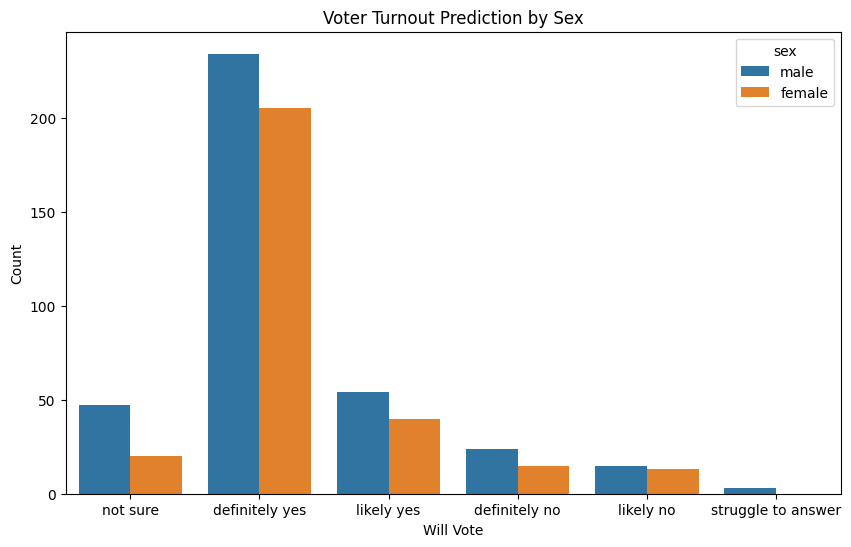

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='will_vote', hue='sex')
plt.title('Voter Turnout Prediction by Sex')
plt.xlabel('Will Vote')
plt.ylabel('Count')
plt.show()


# Candidate Preferences:

# 5. Candidate Popularity: Analyze the popularity of different candidates among various demographic groups (age, sex, income, etc.).

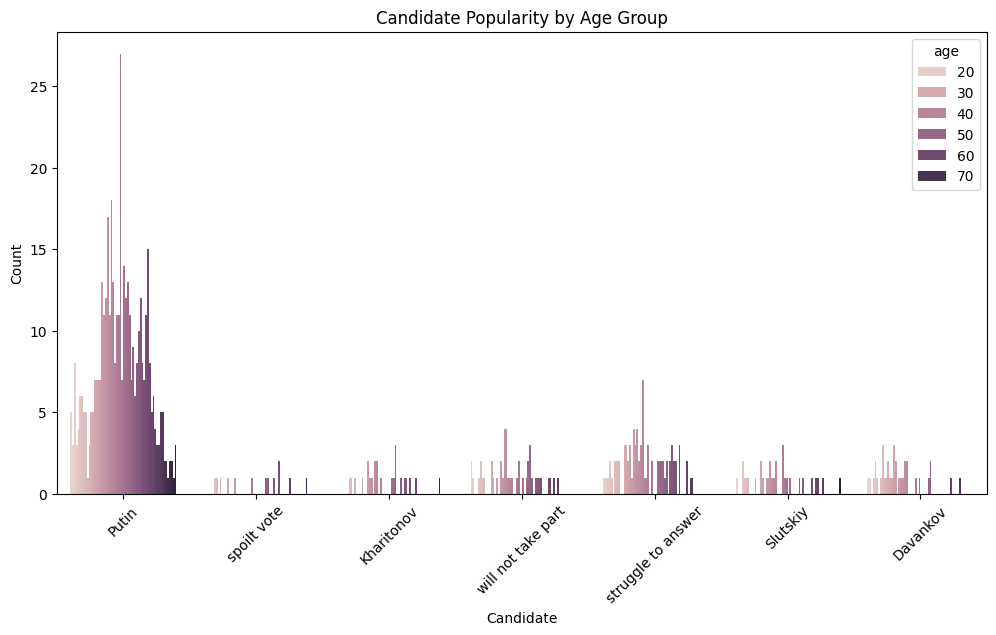

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='candidate', hue='age')
plt.title('Candidate Popularity by Age Group')
plt.xlabel('Candidate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 6. Media Influence on Candidate Preference: Examine how television and internet usage influence candidate preferences.

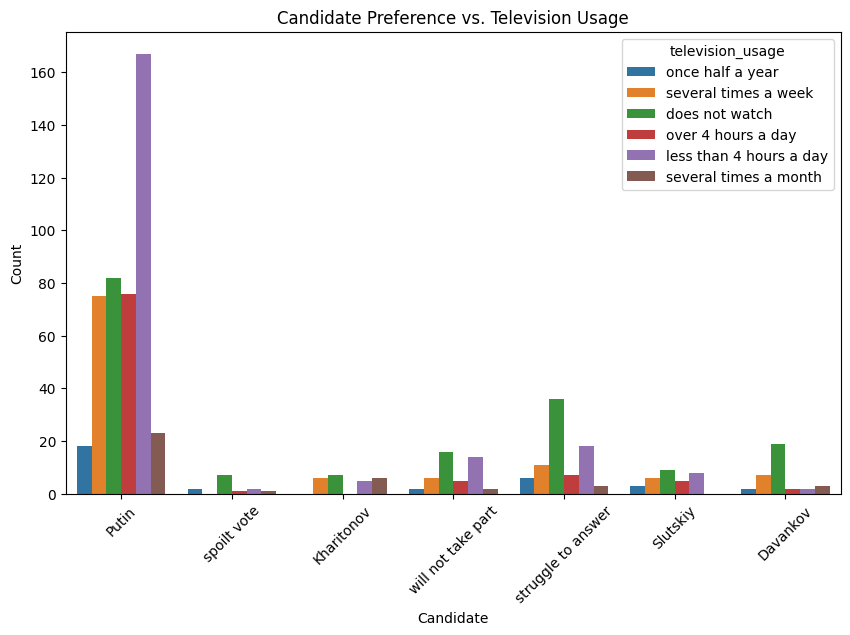

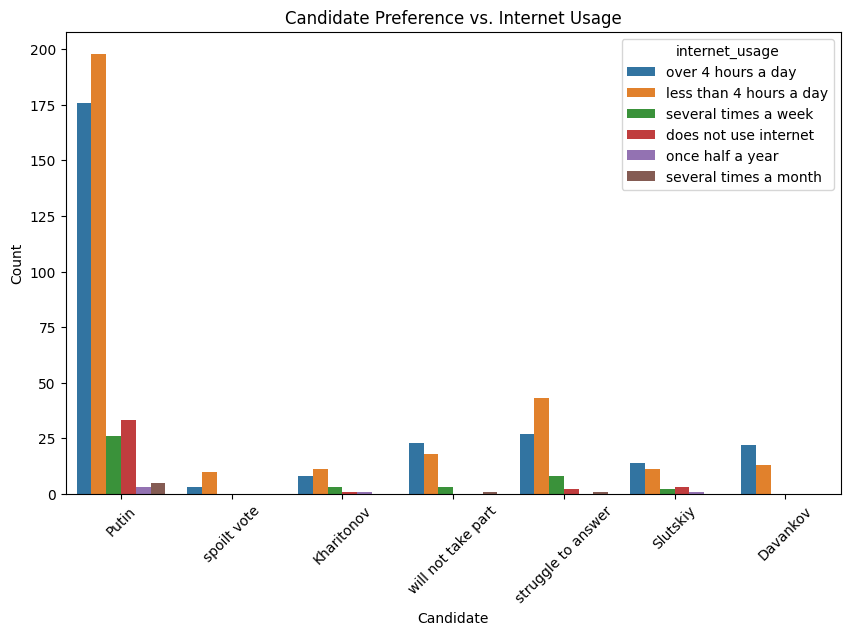

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='candidate', hue='television_usage')
plt.title('Candidate Preference vs. Television Usage')
plt.xlabel('Candidate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='candidate', hue='internet_usage')
plt.title('Candidate Preference vs. Internet Usage')
plt.xlabel('Candidate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Socioeconomic Factors:

# 7. Income and Employment: Investigate the relationship between income levels and employment status, including job type and company type.

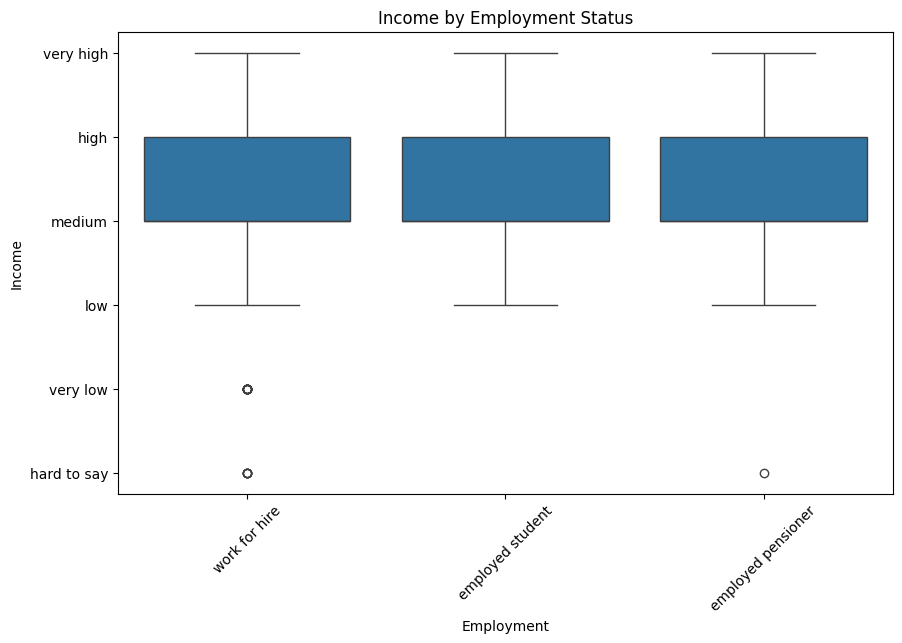

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment', y='income')
plt.title('Income by Employment Status')
plt.xlabel('Employment')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# 8. Education Level vs. Income: Explore the correlation between education levels and income across different voter segments.

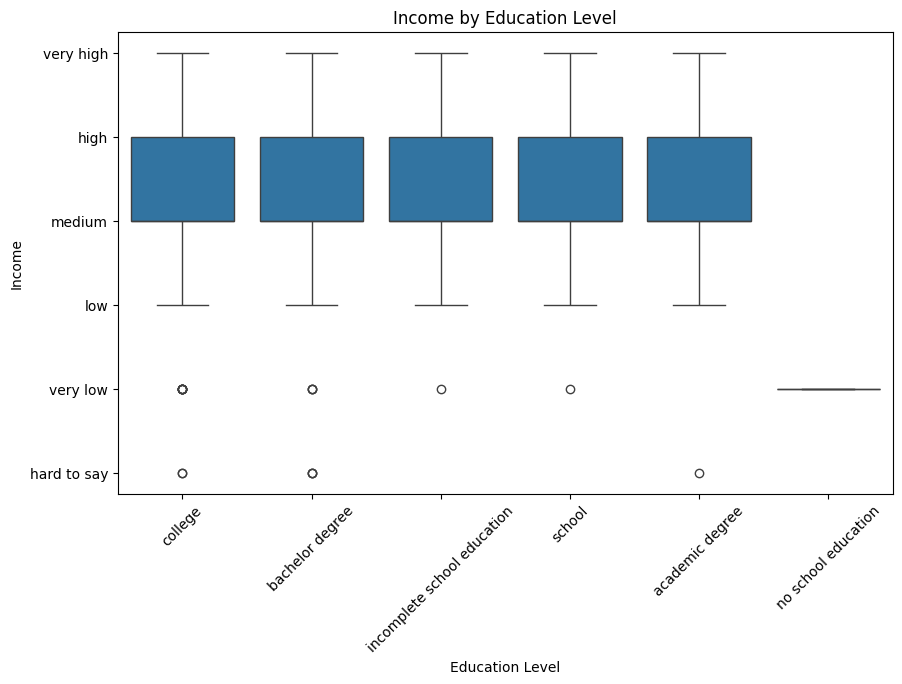

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='education', y='income')
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# Media Consumption:

# 9. Television and Internet Usage: Analyze the distribution of television and internet usage across different demographic groups.

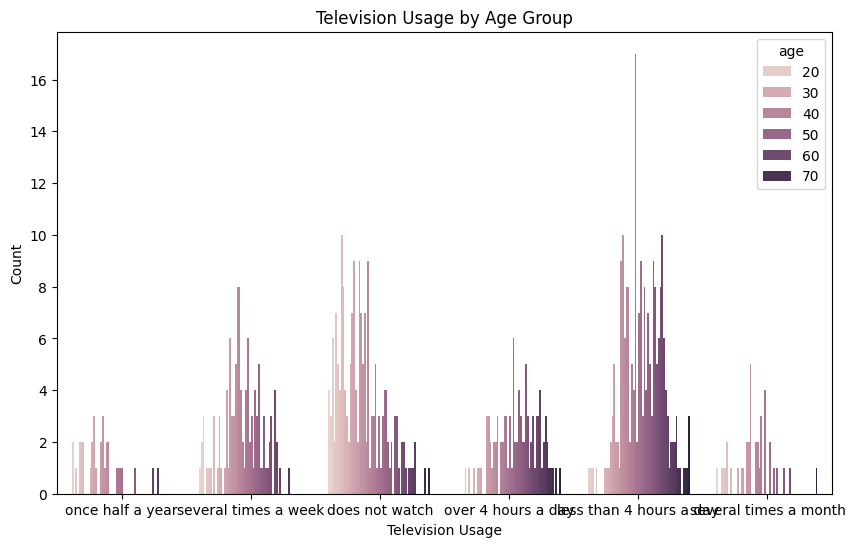

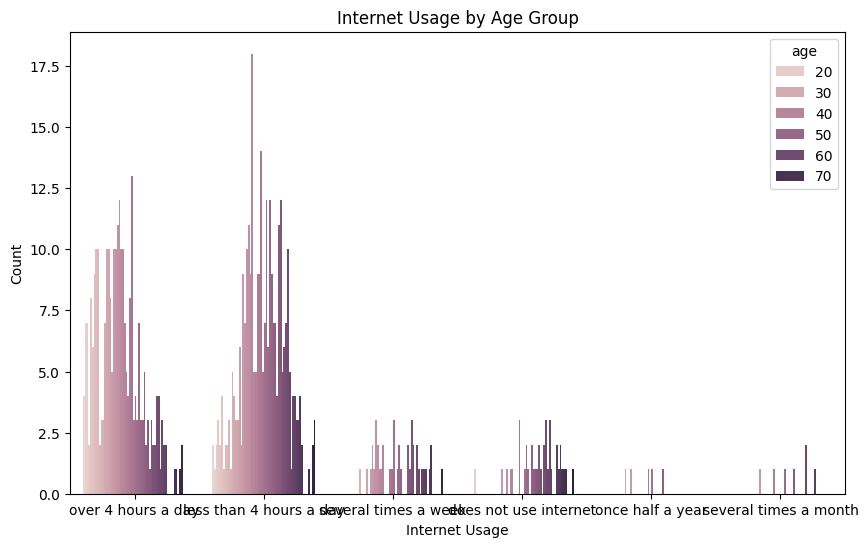

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='television_usage', hue='age')
plt.title('Television Usage by Age Group')
plt.xlabel('Television Usage')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='internet_usage', hue='age')
plt.title('Internet Usage by Age Group')
plt.xlabel('Internet Usage')
plt.ylabel('Count')
plt.show()


# 10. Impact of Media Consumption on Election Awareness: Explore how media consumption patterns (television vs. internet) affect awareness of the election date.

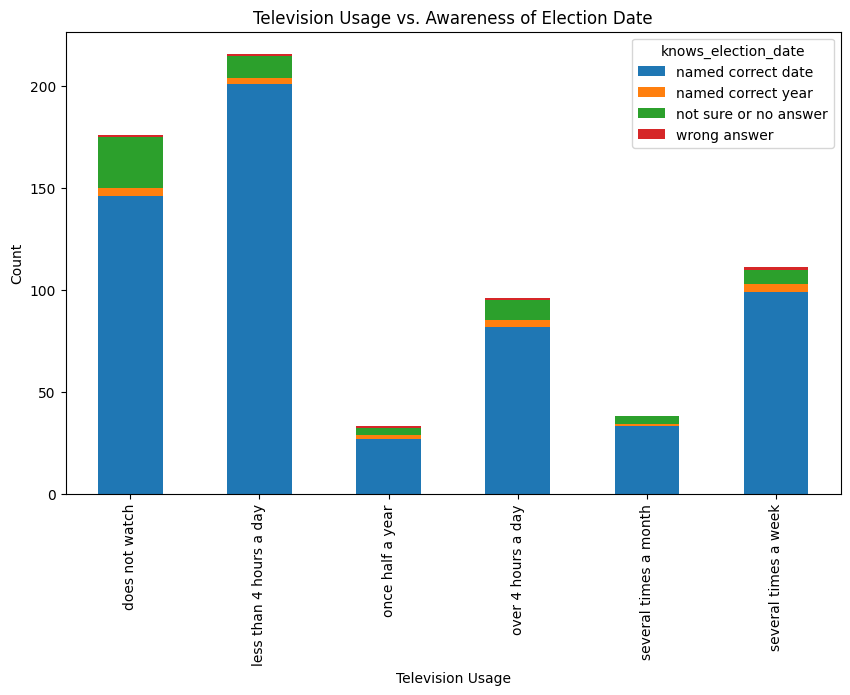

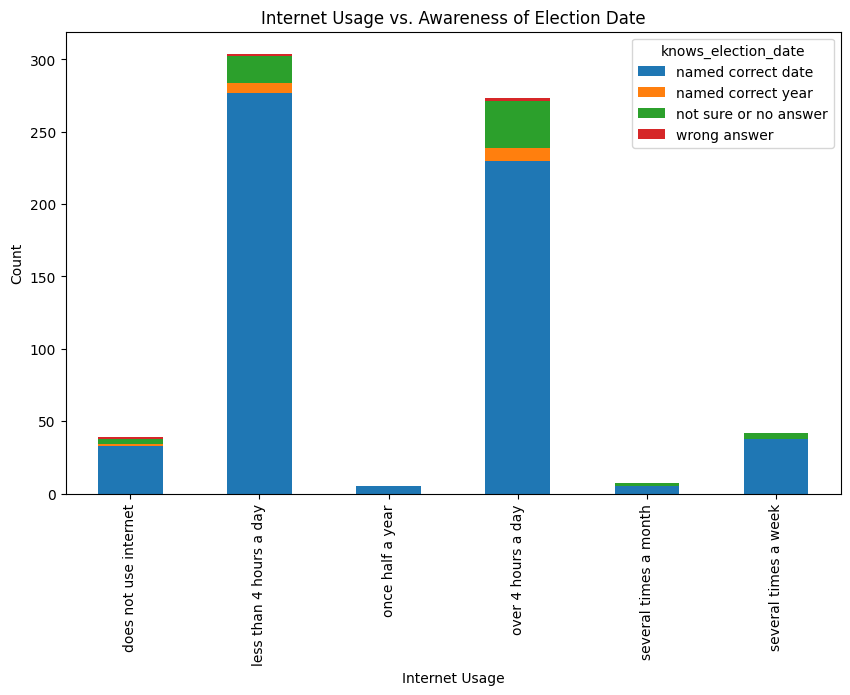

In [63]:
media_vs_awareness = pd.crosstab(df['television_usage'], df['knows_election_date'])
media_vs_awareness.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Television Usage vs. Awareness of Election Date')
plt.xlabel('Television Usage')
plt.ylabel('Count')
plt.show()

media_vs_awareness = pd.crosstab(df['internet_usage'], df['knows_election_date'])
media_vs_awareness.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Internet Usage vs. Awareness of Election Date')
plt.xlabel('Internet Usage')
plt.ylabel('Count')
plt.show()
